# Lab 4: Simulations

Please complete this lab by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

This assignment is due by **11:59pm on Thursday, March 5**.

In [1]:
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Conditionals

In Python, the boolean data type contains only two unique values:  `True` and `False`. Expressions containing comparison operators such as `<` (less than), `>` (greater than), and `==` (equal to) evaluate to Boolean values. A list of common comparison operators can be found below.

<img src="comparisons.png">

Run the cell below to see an example of a comparison operator in action.

In [2]:
3 > 1 + 1

True

We can even assign the result of a comparison operation to a variable.

In [3]:
result = 10 / 2 == 5
result

True

Arrays are compatible with comparison operators. The output is an array of boolean values.

In [4]:
make_array(1, 5, 7, 8, 3, -1) > 3

array([False,  True,  True,  True, False, False])

Consider a game of "Rock, Paper, Scissors", in which two players choose one of three options (rock, paper, or scissors), and the outcome of the game is decided by who chose what. Rock beats Scissors, Scissors beats Paper, and Paper beats Rock. 

Let's try and simulate choosing an option at random using the function, `np.random.choice(...)`.

### `np.random.choice`

`np.random.choice` picks one item at random from the given array. It is equally likely to pick any of the items. Run the cell below several times, and observe how the results change.

In [21]:
sign = make_array('rock', 'paper', 'scissors')
np.random.choice(sign)

'paper'

To repeat this process multiple times, pass in an int `n` as the second argument. By default, `np.random.choice` samples **with replacement** and returns an *array* of items. 

Run the next cell to see an example of sampling with replacement 10 times from the `sign` array.

In [22]:
np.random.choice(sign, 10)

array(['scissors', 'rock', 'paper', 'scissors', 'scissors', 'rock',
       'paper', 'scissors', 'paper', 'rock'], dtype='<U8')

<font color = 'red'>**Question 1. Assume we played ten games, choosing signs at random, and stored the results in an array called `ten_signs` as done below. Find the number of times you chose rock using code (do not hardcode the answer).**</font>

*Hint:* Our solution involves a comparison operator (e.g. `=`, `<`, ...) and the `np.count_nonzero` method or `sum`.

In [23]:
ten_signs = np.random.choice(sign, 10)
ten_signs

array(['scissors', 'scissors', 'rock', 'paper', 'scissors', 'scissors',
       'rock', 'scissors', 'rock', 'paper'], dtype='<U8')

In [25]:
number_rock = np.count_nonzero(ten_signs == 'rock')
number_rock

3

**Conditional Statements**

A conditional statement is a multi-line statement that allows Python to choose among different alternatives based on the truth value of an expression.

Here is a basic example.

```
def sign(x):
    if x > 0:
        return 'Positive'
    else:
        return 'Negative'
```

If the input `x` is greater than `0`, we return the string `'Positive'`. Otherwise, we return `'Negative'`.

If we want to test multiple conditions at once, we use the following general format.

```
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

Only the body for the first conditional expression that is true will be evaluated. Each `if` and `elif` expression is evaluated and considered in order, starting at the top. As soon as a true value is found, the corresponding body is executed, and the rest of the conditional statement is skipped. If none of the `if` or `elif` expressions are true, then the `else body` is executed. 

For more examples and explanation, refer to the section on conditional statements [here](https://www.inferentialthinking.com/chapters/09/1/conditional-statements.html).

In [30]:
test = -1

if test > 0:
    print(test)
if test > -1:
    print('is negative one')

<font color = 'red'>**Question 2. Complete the following conditional statement to print out whether rock was chosen more than three times.**</font>

In [31]:
num_rock = np.count_nonzero(ten_signs == 'rock')

if num_rock > 3:
    print('Rock was chosen more than three times.')
else:
    print('Rock was not chosen more than three times.')






Rock was not chosen more than three times.


<font color = 'red'>**Question 3. Write a function called `rps_result` that returns a string representing how you do against "Rock" based on the sign you chose passed in as an argument.**</font>

In [34]:
def rps_result(sign):
    if sign == 'paper':
        return 'You win!'
    # If rock, return 'Tie game.'
    elif sign == 'rock':
        return 'Tie game'
    # If scissors, return 'You lose.'
    elif sign == 'scissors':
        return 'You Lose.'
    else:
        return 'Did not give rock, paper, or scissors.'

outcome = rps_result('scissors')
outcome

'You Lose.'

<font color = 'red'>**Question 4. Create a table `ten_games` that consists of the signs in `ten_signs` as well as the outcomes for each of those games, assuming your opponent chooses "Rock" every time.**</font>

*Hint:* Use the `apply` method. 

In [37]:
ten_games_tbl = Table().with_column('Signs', ten_signs)
outcomes = ten_games_tbl.apply(rps_result, 'Signs')

In [39]:
ten_games = ten_games_tbl.with_column('Outcome', outcomes)
ten_games

Signs,Outcome
scissors,You Lose.
scissors,You Lose.
rock,Tie game
paper,You win!
scissors,You Lose.
scissors,You Lose.
rock,Tie game
scissors,You Lose.
rock,Tie game
paper,You win!


<font color = 'red'>**Question 5. Using code, find the number of 'You Win!' reactions for the results in `ten_games`.**</font>

In [45]:
ten_games.column('Outcome')

array(['You Lose.', 'You Lose.', 'Tie game', 'You win!', 'You Lose.',
       'You Lose.', 'Tie game', 'You Lose.', 'Tie game', 'You win!'],
      dtype='<U9')

In [44]:
sum(ten_games.column('Outcome') == 'You win!')




2

In [47]:
ten_games.where('Outcome', are.equal_to('You win!')).num_rows

2

<font color = 'red'>**Question 6. Allie is playing darts. Her dartboard contains ten equal-sized zones with point values from 1 to 10. Write code that simulates her total score after 1000 dart tosses.**</font>

*Hint:* First decide the possible values you can take in the experiment (point values in this case). Then use `np.random.choice` to simulate Allie's tosses. Finally, sum up the scores to get Allie's total score.

In [ ]:
possible_point_values = np.arange(1,11) # make_array(1,2,3,4,5,6,7,8,9,10)
num_tosses = 1000
simulated_tosses = ...
total_score = ...

total_score

## Simulations and For Loops
Using a `for` statement, we can perform a task multiple times. This is known as iteration.

One use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow.

In [51]:
col = 'red'

In [52]:
rainbow = make_array("red", "orange", "yellow", "green", "blue", "indigo", "violet")

for i in col:
    print(i)

r
e
d


We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. Note that the name `color` is arbitrary; we could easily have named it something else. The important thing is we stay consistent throughout the `for` loop. 

In [53]:
for another_name in rainbow:
    print(another_name)

red
orange
yellow
green
blue
indigo
violet


In general, however, we would like the variable name to be somewhat informative. 

<font color = 'red'>**Question 7. Using a simulation with 10,000 trials, assign `chance_not_tie` to an estimate of the chance that if you pick two signs from `sign`, they are NOT the same (that is, not both "rock" or both "scissors" or both "paper")**</font>

*Hint 1*: What function did we use in section 1 to sample at random with replacement from an array? 

*Hint 2*: Remember that `!=` checks for non-equality between two items.

In [74]:
np.random.choice(sign) != np.random.choice(sign)

False

In [55]:
trials = 10000

array(['scissors', 'rock'], dtype='<U8')

In [75]:
total_different = 0
for i in np.arange(trials):
    different = np.random.choice(sign) != np.random.choice(sign)
    total_different = total_different + different

chance_not_tie = total_different/trials

chance_not_tie

0.6688

## 3. Sampling Basketball Data

Run the cell below to load the player and salary data. 

In [76]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")

# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


Rather than getting data on every player, imagine that we had gotten data on only a smaller subset of the players.  For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make statistical inferences about a large underlying population using a smaller sample.

### Statistical inference

A *statistical inference* is a statement about some statistic of the underlying population, such as "the average salary of NBA players in 2014 was $3".  You may have heard the word "inference" used in other contexts.  It's important to keep in mind that statistical inferences, unlike, say, logical inferences, can be wrong.

A general strategy for inference using samples is to estimate statistics of the population by computing the same statistics on a sample.  This strategy sometimes works well and sometimes doesn't.  The degree to which it gives us useful answers depends on several factors, and we'll touch lightly on a few of those today.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the `histograms` function below, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. It uses bin widths of 1 year for `Age` and $1,000,000 for `Salary`.

Two histograms should be displayed below


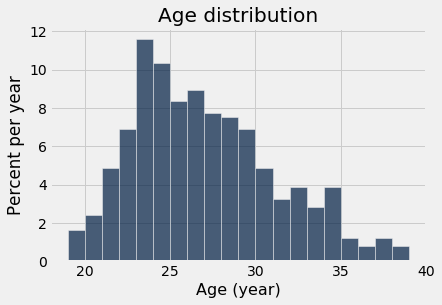

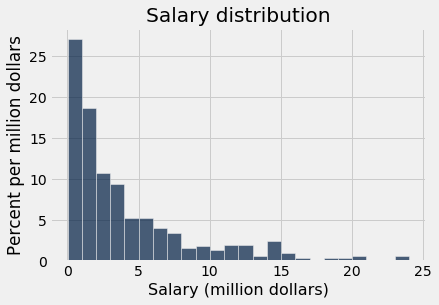

In [77]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')/1000000
    t1 = t.drop('Salary').with_column('Salary', salaries)
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins, unit='year')
    plt.title('Age distribution')
    t1.hist('Salary', bins=salary_bins, unit='million dollars')
    plt.title('Salary distribution') 
    
histograms(full_data)
print('Two histograms should be displayed below')

<font color = 'red'>**Question 8. Create a function called `compute_statistics` that takes a table containing ages and salaries and:**</font>
- Draws a histogram of ages
- Draws a histogram of salaries
- Returns a two-element array containing the average age and average salary (in that order)

*Hint:* You can call the `histograms` function to draw the histograms! 

array([2.65365854e+01, 4.26977577e+06])

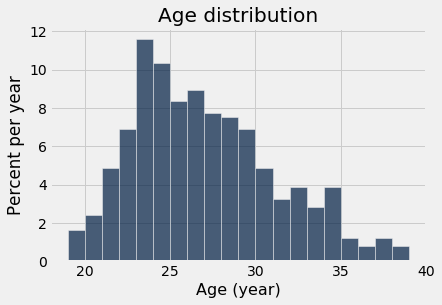

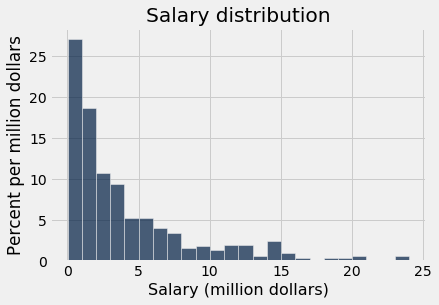

In [78]:
def compute_statistics(age_and_salary_data):
    histograms(age_and_salary_data)
    age = np.mean(age_and_salary_data.column('Age'))
    salary = np.mean(age_and_salary_data.column('Salary'))
    return make_array(age, salary)
    

full_stats = compute_statistics(full_data)
full_stats

### Simple random sampling

Most times, we won't be able to observe the full population and only be able to look at sample. In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The table method `sample` produces a random sample from the table. By default, it draws at random *with replacement* from the rows of a table. It takes in the sample size as its argument and returns a *table* with only the rows that were selected. The optional argument `with_replacement=False` specifies that the sample should be drawn without replacement.

Run the cell below to see an example call.

In [81]:
# Just run this cell

salary_data.sample(5, with_replacement=False)

PlayerName,Salary
Lance Thomas,948163
LeBron James,20644400
Dwight Buycks,62437
DeMar DeRozan,10100000
Kevin Garnett,12000000


<font color = 'red'>**Question 9. Produce a simple random sample of size 44 from `full_data`. Run your analysis on it again.  Run the cell a few times to see how the histograms and statistics change across different samples.**</font>

- How much does the average age change across samples? 
- What about average salary?

array([2.58863636e+01, 3.81758002e+06])

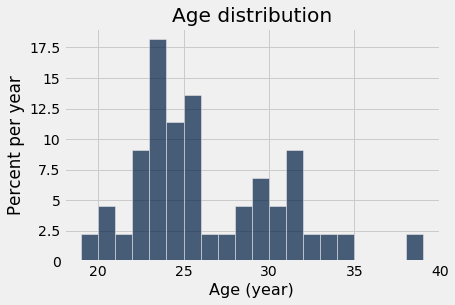

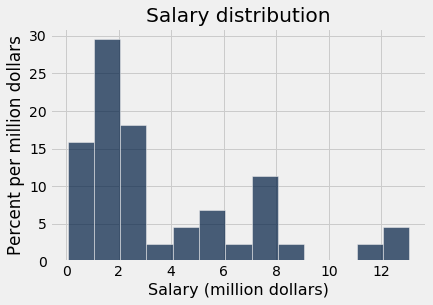

In [84]:
my_small_srswor_data = full_data.sample(44, with_replacement = False)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

<font color = 'red'>**Question 10. As in the previous question, analyze several simple random samples of size 100 from `full_data`.**</font>
- Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?  
- Are the sample averages and histograms closer to their true values/shape for age or for salary?  What did you expect to see?

In [ ]:
my_large_srswor_data = ...
my_large_stats = ...
my_large_stats